## Problem

$$f(w_1, w_2) = 0.1w_1^2 + 2w_2^2 \;\;\;\;\;\;\;(1)$$

In [1]:
import numpy as np

### GD

In [2]:
def df_w(W):
    """
    Thực hiện tính gradient của dw1 và dw2
    Arguments:
    W -- np.array [w1, w2]
    Returns:
    dW -- np.array [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    """
    #################### YOUR CODE HERE ####################
    dw1 = 0.2*W[0]
    dw2 = 4*W[1]
    
    dW = np.array([dw1 , dw2])
    ########################################################

    return dW

In [3]:
def sgd(W, dW, lr):
    """
    Thực hiện thuật tóa Gradient Descent để update w1 và w2
    Arguments:
    W -- np.array: [w1, w2]
    dW -- np.array: [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    lr -- float: learning rate
    Returns:
    W -- np.array: [w1, w2] w1 và w2 sau khi đã update
    """
    #################### YOUR CODE HERE ####################


    W = W - lr * dW
    ########################################################
    return W

In [4]:
def train_p1(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm minimum của function (1) dựa vào thuật toán
    được truyền vào từ optimizer
    Arguments:
    optimize : function thực hiện thuật toán optimization cụ thể
    lr -- float: learning rate
    epoch -- int: số lượng lần (epoch) lặp để tìm điểm minimum
    Returns:
    results -- list: list các cặp điểm [w1, w2] sau mỗi epoch (mỗi lần cập nhật)
    """

    # initial point
    W = np.array([-5, -2], dtype=np.float32)
    # list of results
    results = [W]
    #################### YOUR CODE HERE ####################
    # Tạo vòng lặp theo số lần epochs
    # tìm gradient dW gồm dw1 và dw2
    # dùng thuật toán optimization cập nhật w1 và w2
    # append cặp [w1, w2] vào list results

    for iters in range(epochs):
        dW = df_w(W)
        W = sgd(W, dW , lr)
        results.append(W)


    ########################################################
    return results

In [5]:
results = train_p1(sgd, lr=0.4, epochs=30)
results

[array([-5., -2.], dtype=float32),
 array([-4.6,  1.2]),
 array([-4.232, -0.72 ]),
 array([-3.89344,  0.432  ]),
 array([-3.5819648, -0.2592   ]),
 array([-3.29540762,  0.15552   ]),
 array([-3.03177501, -0.093312  ]),
 array([-2.78923301,  0.0559872 ]),
 array([-2.56609437, -0.03359232]),
 array([-2.36080682,  0.02015539]),
 array([-2.17194227, -0.01209324]),
 array([-1.99818689,  0.00725594]),
 array([-1.83833194, -0.00435356]),
 array([-1.69126538,  0.00261214]),
 array([-1.55596415, -0.00156728]),
 array([-1.43148702e+00,  9.40369969e-04]),
 array([-1.31696806e+00, -5.64221981e-04]),
 array([-1.21161061e+00,  3.38533189e-04]),
 array([-1.11468176e+00, -2.03119913e-04]),
 array([-1.02550722e+00,  1.21871948e-04]),
 array([-9.43466646e-01, -7.31231688e-05]),
 array([-8.67989314e-01,  4.38739013e-05]),
 array([-7.98550169e-01, -2.63243408e-05]),
 array([-7.34666155e-01,  1.57946045e-05]),
 array([-6.75892863e-01, -9.47676268e-06]),
 array([-6.21821434e-01,  5.68605761e-06]),
 array([-

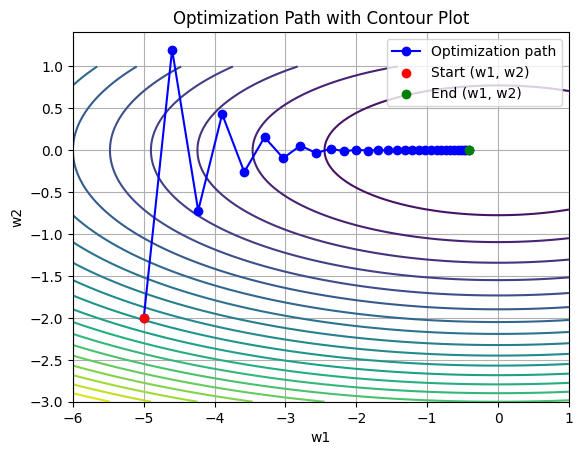

In [6]:
import matplotlib.pyplot as plt

def plot_optimization_path(results):
    """
    Plot the optimization path (w1, w2) over the epochs.
    
    Arguments:
    results -- list of numpy arrays: List of [w1, w2] values at each epoch
    """
    # Extract the values of w1 and w2 from results
    w1_values = [result[0] for result in results]
    w2_values = [result[1] for result in results]

    # Plot the path of the optimization
    w1_range = np.linspace(-6, 1, 100)
    w2_range = np.linspace(-3, 1, 100)
    W1, W2 = np.meshgrid(w1_range, w2_range)
    
    # Example: Loss function to plot contours (you could define your own)
    Z = 0.1 * W1**2 + W2**2  # A simple quadratic function, for example
    
    plt.contour(W1, W2, Z, levels=20, cmap='viridis')
    plt.plot(w1_values, w2_values, marker='o', linestyle='-', color='b', label='Optimization path')
    plt.scatter(w1_values[0], w2_values[0], color='red', label='Start (w1, w2)', zorder=5)
    plt.scatter(w1_values[-1], w2_values[-1], color='green', label='End (w1, w2)', zorder=5)
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.title('Optimization Path with Contour Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Show the plot
    plt.show()
plot_optimization_path(results)